# WeatherPy
----

#### Observable Trends
* As expected, as you move closer to the equator the cities maximum tempature rises.  The warmest tempatures are approximately between the tropic of cancer and capricorn. 
* There is little relation between the city's latitude and humidity.  Although, the humidity levels seemed to be lower in the Northern hemisphere in between 15 - 40 degrees latitude on the day the data was pulled.
* There seems to be little relation between the city's latitude and cloudiness. 
* The northern hemisphere can experience higher winds. Yet, overall there seems to be little relation between the city's latitude and wind speed. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#build the dataframe
city_data_df = pd.DataFrame(columns=(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 
                                      'Wind Speed', 'Country', 'Date']))
#load cities in df
city_data_df['City'] = cities

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
rec_num = 1
failed = 0

print("Beginning Data Retrieval")    
print("-----------------------------")

for index, row in city_data_df.iterrows():
    city = row['City']
    try:
        query_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"  
        response = requests.get(query_url).json() 
        
        #load city weather data into data frame
        city_data_df.loc[index, 'City'] = response['name']
        city_data_df.loc[index, 'Lat'] = response['coord']['lat']
        city_data_df.loc[index, 'Lng'] = response['coord']['lon']
        city_data_df.loc[index, 'Max Temp'] = response['main']['temp_max'] ### Farenheit ###
        city_data_df.loc[index, 'Humidity'] = response['main']['humidity'] ### percentage ###
        city_data_df.loc[index, 'Cloudiness'] = response['clouds']['all'] ### percentage ###
        city_data_df.loc[index, 'Wind Speed'] = response['wind']['speed'] ### mph ###
        city_data_df.loc[index, 'Country'] = response['sys']['country']
        date = (datetime.datetime.fromtimestamp(response['dt'])).strftime('%Y-%m-%d %H:%M:%S')
        city_data_df.loc[index, 'Date'] = date 
        
        print(f"Processing Record #{rec_num} city name: {row['City']}")
        rec_num += 1
    except (KeyError, IndexError):
        print(f"{row['City']} not found skipping...")
        city_data_df.drop(index, inplace=True)
        failed += 1
        
print(f"Number of records skipped: {failed}")
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record #1 city name: Goderich
Processing Record #2 city name: Chala
Processing Record #3 city name: Hofn
Processing Record #4 city name: Butaritari
Processing Record #5 city name: Hermanus
Processing Record #6 city name: Kapaa
Processing Record #7 city name: Lusambo
Processing Record #8 city name: Rikitea
Processing Record #9 city name: Mataura
Processing Record #10 city name: Wajima
Processing Record #11 city name: Salta
Processing Record #12 city name: San Patricio
tungkang not found skipping...
Processing Record #13 city name: nosy varika
Processing Record #14 city name: coihaique
Processing Record #15 city name: thompson
Processing Record #16 city name: hashtrud
illoqqortoormiut not found skipping...
Processing Record #17 city name: ushuaia
Processing Record #18 city name: novobelokatay
Processing Record #19 city name: waslala
Processing Record #20 city name: punta arenas
Processing Record #21 city name: chokurdakh
P

Processing Record #180 city name: bonthe
Processing Record #181 city name: develi
Processing Record #182 city name: dzilam gonzalez
Processing Record #183 city name: sept-iles
Processing Record #184 city name: nawa
Processing Record #185 city name: lorengau
Processing Record #186 city name: dharchula
Processing Record #187 city name: lichinga
amderma not found skipping...
Processing Record #188 city name: rundu
Processing Record #189 city name: kemise
Processing Record #190 city name: saint-philippe
Processing Record #191 city name: richards bay
karakose not found skipping...
Processing Record #192 city name: maceio
Processing Record #193 city name: norman wells
Processing Record #194 city name: gat
Processing Record #195 city name: dikson
Processing Record #196 city name: hamilton
Processing Record #197 city name: raudeberg
Processing Record #198 city name: dhidhdhoo
Processing Record #199 city name: abu samrah
Processing Record #200 city name: saldanha
Processing Record #201 city nam

Processing Record #358 city name: bima
Processing Record #359 city name: ossora
Processing Record #360 city name: kupang
Processing Record #361 city name: bambamarca
Processing Record #362 city name: bereda
Processing Record #363 city name: vila franca do campo
Processing Record #364 city name: namtsy
Processing Record #365 city name: salinas
Processing Record #366 city name: grindavik
Processing Record #367 city name: port hawkesbury
Processing Record #368 city name: labuhan
Processing Record #369 city name: peniche
Processing Record #370 city name: iwanai
Processing Record #371 city name: paamiut
Processing Record #372 city name: bukachacha
Processing Record #373 city name: bubaque
Processing Record #374 city name: umea
Processing Record #375 city name: khandyga
Processing Record #376 city name: broken hill
halalo not found skipping...
Processing Record #377 city name: ust-nera
Processing Record #378 city name: lagunas
Processing Record #379 city name: caravelas
Processing Record #38

Processing Record #534 city name: kysyl-syr
Processing Record #535 city name: iki-burul
Processing Record #536 city name: solano
Processing Record #537 city name: sheridan
Processing Record #538 city name: solnechnyy
Processing Record #539 city name: launceston
Processing Record #540 city name: fort nelson
Processing Record #541 city name: vila velha
Processing Record #542 city name: filimonovo
Processing Record #543 city name: benghazi
Processing Record #544 city name: kropotkin
Processing Record #545 city name: mezen
Processing Record #546 city name: ryzdvyanyy
Processing Record #547 city name: imbituba
Processing Record #548 city name: puyang
Processing Record #549 city name: mount isa
Processing Record #550 city name: tulun
Processing Record #551 city name: kirensk
Processing Record #552 city name: tagusao
Processing Record #553 city name: waunakee
Processing Record #554 city name: monchegorsk
Processing Record #555 city name: vila do maio
Processing Record #556 city name: demidov


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_df.to_csv(output_data_file, index=False)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goderich,43.7501,-81.7165,35.6,55,100,4.61,CA,2021-04-20 17:04:15
1,Chala,-7.5833,31.2667,60.8,94,75,5.75,TZ,2021-04-20 17:04:15
2,Hofn,64.2539,-15.2082,36.91,43,14,7.81,IS,2021-04-20 17:02:30
3,Butaritari,3.0707,172.79,82.11,76,91,18.61,KI,2021-04-20 17:01:27
4,Hermanus,-34.4187,19.2345,60.01,90,100,5.01,ZA,2021-04-20 17:01:12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_data_df['Humidity'].max()

100

In [9]:
#  Get the indices of cities that have humidity over 100%.
#  N/A

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
#read in cities.csv file to data frame
weather_df = pd.read_csv("output_data/cities.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goderich,43.7501,-81.7165,35.60,55,100,4.61,CA,2021-04-20 17:04:15
1,Chala,-7.5833,31.2667,60.80,94,75,5.75,TZ,2021-04-20 17:04:15
2,Hofn,64.2539,-15.2082,36.91,43,14,7.81,IS,2021-04-20 17:02:30
3,Butaritari,3.0707,172.7902,82.11,76,91,18.61,KI,2021-04-20 17:01:27
4,Hermanus,-34.4187,19.2345,60.01,90,100,5.01,ZA,2021-04-20 17:01:12


## Latitude vs. Temperature Plot

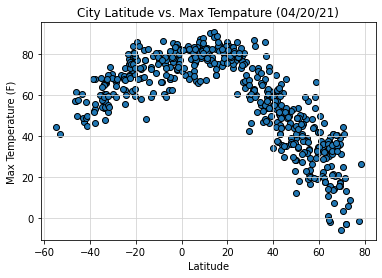

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Tempature (04/20/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsMaxTemp')
plt.show()

* This code is analyzing each city's latitude coordinate with it's maximum 
tempature for the date listed in the title. Positive latitude represents the northern hemisphere and negative latitude represents the southern hemisphere. Maximum tempature is measured in degrees Farenheit.

## Latitude vs. Humidity Plot

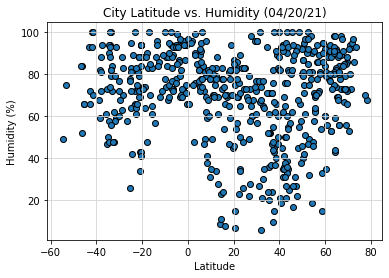

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (04/20/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle="-",color='lightgrey')

plt.savefig('output_data/LatVsHumid')
plt.show()

* This code is analyzing each city's latitude coordinate with it's humidity level for the date listed in the title.  Humidity is measured in percent. 

## Latitude vs. Cloudiness Plot

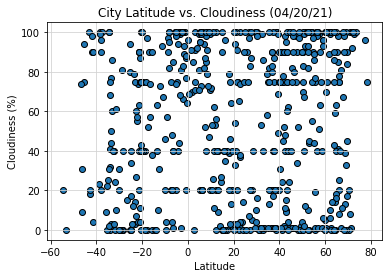

In [14]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (04/20/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsCloud')
plt.show()

* This code is analyzing each city's latitude coordinate with it's cloudiness level for the date listed in the title.  Cloudiness is measured in percent.

## Latitude vs. Wind Speed Plot

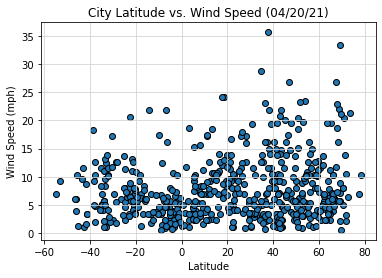

In [15]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (04/20/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

plt.savefig('output_data/LatVsWind')
plt.show()

* This code is analyzing each city's latitude coordinate with it's wind speed for the date listed in the title.  Wind speed is measured in miles per hour.

## Linear Regression

In [16]:
north_hemi = weather_df.loc[weather_df['Lat'] >= 0]
south_hemi = weather_df.loc[weather_df['Lat'] < 0]
north_count = len(north_hemi)
south_count = len(south_hemi)
print(f"There are {north_count} cities in the northern hemisphere from the dataframe.")
print(f"There are {south_count} cities in the southern hemisphere from the dataframe.")

There are 387 cities in the northern hemisphere from the dataframe.
There are 172 cities in the southern hemisphere from the dataframe.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

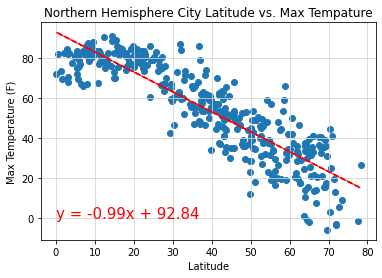

The r-value is: 0.7817837846370937


In [17]:
north_hemi_lat = north_hemi['Lat']
north_hemi_max_temp = north_hemi['Max Temp']
# Perform a linear regression for the Northern Hemisphere on cities max temp vs latitude
ntl_slope, ntl_int, ntl_r, ntl_p, ntl_std_err = linregress(north_hemi_lat, north_hemi_max_temp)

# Create equation of line to calculate predicted max temp
ntl_fit = ntl_slope * north_hemi_lat + ntl_int

# Create line equation string
line_eq = f"y = {ntl_slope:1.2f}x + {ntl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_max_temp)
plt.plot(north_hemi_lat, ntl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(0, 0),fontsize=15,color="red")

plt.savefig('output_data/NorthHemiLatVsMaxTemp')
plt.show()

print(f"The r-value is: {ntl_r**2}")

* This plot shows each northern hemisphere city's latitude with it's maxium tempature.  As a city nears the equator(0), the tempature rises. The estimated tempature line also reflects this.  There is a pretty strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

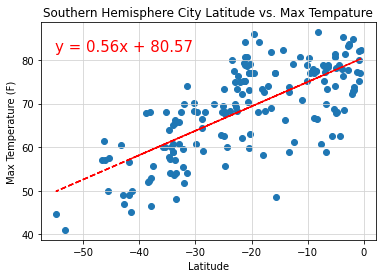

The r-value is: 0.5100244064810707


In [18]:
south_hemi_lat = south_hemi['Lat']
south_hemi_max_temp = south_hemi['Max Temp']
# Perform a linear regression for the Southern Hemisphere on cities max temp vs latitude
stl_slope, stl_int, stl_r, stl_p, stl_std_err = linregress(south_hemi_lat, south_hemi_max_temp)

# Create equation of line to calculate predicteded max temp
stl_fit = stl_slope * south_hemi_lat + stl_int

# Create line equation string
line_eq = f"y = {stl_slope:1.2f}x + {stl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_max_temp)
plt.plot(south_hemi_lat, stl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(-55, 82),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsMaxTemp')
plt.show()

print(f"The r-value is: {stl_r**2}")

* This plot shows each southern hemisphere city's latitude with it's maxium tempature. As a city nears the equator(0), the tempature rises. The estimated tempature line also reflects this.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

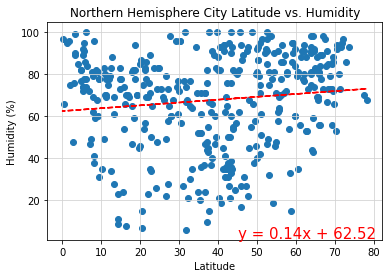

The r-value is: 0.01476419593977913


In [19]:
north_hemi_humidity = north_hemi['Humidity']
# Perform a linear regression for the Northern Hemisphere on cities humidity vs latitude
nhl_slope, nhl_int, nhl_r, nhl_p, nhl_std_err = linregress(north_hemi_lat, north_hemi_humidity)

# Create equation of line to calculate predicted humidity
nhl_fit = nhl_slope * north_hemi_lat + nhl_int

# Create line equation string
line_eq = f"y = {nhl_slope:1.2f}x + {nhl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_humidity)
plt.plot(north_hemi_lat, nhl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(45, 2),fontsize=15,color="red")

plt.savefig('output_data/NorthHemiLatVsHumid')
plt.show()

print(f"The r-value is: {nhl_r**2}") 

* This plot shows each northern hemisphere city's latitude with it's humidity.  This relationship is weak.  The slope of the line is low and the correlation is low.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

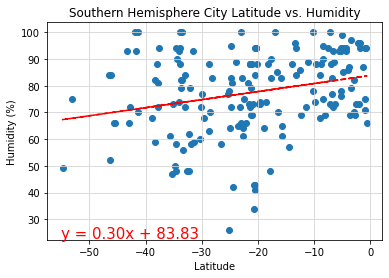

The r-value is: 0.06776340821706912


In [20]:
south_hemi_humidity = south_hemi['Humidity']
# Perform a linear regression for the Southern Hemisphere on cities humidity vs latitude
shl_slope, shl_int, shl_r, shl_p, shl_std_err = linregress(south_hemi_lat, south_hemi_humidity)

# Create equation of line to calculate predicted humidity
shl_fit = shl_slope * south_hemi_lat + shl_int

# Create line equation string
line_eq = f"y = {shl_slope:1.2f}x + {shl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_humidity)
plt.plot(south_hemi_lat, shl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(-55, 23),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsHumid')
plt.show()

print(f"The r-value is: {shl_r**2}")

* This plot shows each southern hemisphere city's latitude with it's humidity.  This plot shows a stronger relationship than the northern hemisphere.  Although the correlation is relatively low, the estimated humidity shows that as cities near the equator humidy levels rise.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

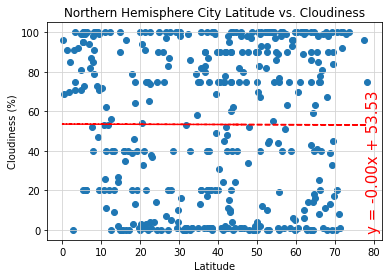

The r-value is: 6.743590601999587e-06


In [21]:
north_hemi_cloudiness = north_hemi['Cloudiness']
# Perform a linear regression for the Northern Hemisphere on cities cloudiness vs latitude
ncl_slope, ncl_int, ncl_r, ncl_p, ncl_std_err = linregress(north_hemi_lat, north_hemi_cloudiness)

# Create equation of line to calculate predicted cloudiness
ncl_fit = ncl_slope * north_hemi_lat + ncl_int

# Create line equation string
line_eq = f"y = {ncl_slope:1.2f}x + {ncl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_cloudiness)
plt.plot(north_hemi_lat, ncl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(78, 0),fontsize=15,color="red", rotation='vertical')

plt.savefig('output_data/NorthHemiLatVsCloud')
plt.show()

print(f"The r-value is: {ncl_r**2}")

* This plot shows each northern hemisphere city's latitude with it's cloudiness.  This relationship is very weak.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

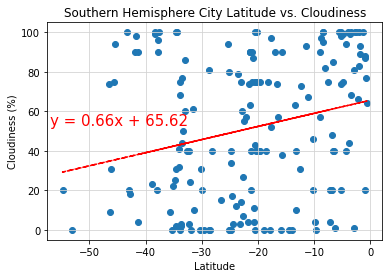

The r-value is: 0.05801828686529659


In [27]:
south_hemi_cloudiness = south_hemi['Cloudiness']
# Perform a linear regression for the Southern Hemisphere on cities cloudiness vs latitude
scl_slope, scl_int, scl_r, scl_p, scl_std_err = linregress(south_hemi_lat, south_hemi_cloudiness)

# Create equation of line to calculate predicted cloudiness
scl_fit = scl_slope * south_hemi_lat + scl_int

# Create line equation string
line_eq = f"y = {scl_slope:1.2f}x + {scl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_cloudiness)
plt.plot(south_hemi_lat, scl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq, (-57, 53),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsCloud')
plt.show()

print(f"The r-value is: {scl_r**2}")

* This plot shows each southern hemisphere city's latitude with it's cloudiness.  The estimated cloudiness data points show that as you near the equator it's cloudier.  Yet, this data relies on one day and could be an execpt to the normal.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

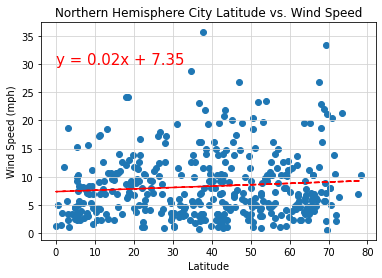

The r-value is: 0.007175325637105367


In [31]:
north_hemi_wind = north_hemi['Wind Speed']
# Perform a linear regression for the Northern Hemisphere on cities wind speed vs latitude
nwl_slope, nwl_int, nwl_r, nwl_p, nwl_std_err = linregress(north_hemi_lat, north_hemi_wind)

# Create equation of line to calculate predicted wind speed
nwl_fit = nwl_slope * north_hemi_lat + nwl_int

# Create line equation string
line_eq = f"y = {nwl_slope:1.2f}x + {nwl_int:1.2f}"

plt.scatter(north_hemi_lat, north_hemi_wind)
plt.plot(north_hemi_lat, nwl_fit, "--", color = 'r')

plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(0, 30),fontsize=15,color="red")

plt.savefig('output_data/NorthHemiLatVsWind')
plt.show()

print(f"The r-value is: {nwl_r**2}")

* This plot shows each northern hemisphere city's latitude with it's wind speed.  The correlation is low.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

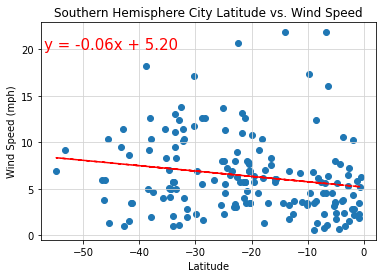

The r-value is: 0.033398083918403175


In [30]:
south_hemi_wind = south_hemi['Wind Speed']
# Perform a linear regression for the Southern Hemisphere on cities wind speed vs latitude
swl_slope, swl_int, swl_r, swl_p, swl_std_err = linregress(south_hemi_lat, south_hemi_wind)

# Create equation of line to calculate predicted wind speed
swl_fit = swl_slope * south_hemi_lat + swl_int

# Create line equation string
line_eq = f"y = {swl_slope:1.2f}x + {swl_int:1.2f}"

plt.scatter(south_hemi_lat, south_hemi_wind)
plt.plot(south_hemi_lat, swl_fit, "--", color = 'r')

plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.annotate(line_eq,(-57, 20),fontsize=15,color="red")

plt.savefig('output_data/SouthHemiLatVsWind')
plt.show()

print(f"The r-value is: {swl_r**2}")

* This plot shows each southern hemisphere city's latitude with it's wind speed.  The correclation is low, but the estimated data points show wind speed could rise as you get further from the equator.